# **Data Understanding**

## **1. Import Library**
Kita mulai dengan mengimpor library Python yang dibutuhkan: pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi.

In [1]:
# Install required packages
%pip install seaborn

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import PyCaret untuk EDA dan classification
try:
    from pycaret.datasets import get_data
    from pycaret.classification import *
    from pycaret.anomaly import *
    print("PyCaret berhasil diimport")
except ImportError:
    print("PyCaret tidak tersedia. Install dengan: pip install pycaret")

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
PyCaret berhasil diimport
Library berhasil diimport


## **2. Load Dataset**

Dataset Iris akan dimuat dari file CSV. Pastikan file CSV berada di folder yang sama atau sesuaikan path-nya.

In [2]:
# Load dataset Iris dari file CSV atau PyCaret
try:
    # 1️⃣ Coba load dari file lokal
    df = pd.read_csv('data_iris.csv', delimiter=';')

    # 2️⃣ Konversi kolom numerik (kalau pakai koma sebagai decimal separator)
    numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    # 3️⃣ Mapping species (jika ada kolom Class)
    if 'Class' in df.columns:
        df['species_name'] = df['Class'].map({
            'Iris-setosa': 'setosa',
            'Iris-versicolor': 'versicolor',
            'Iris-virginica': 'virginica'
        })
        df['species'] = df['species_name'].map({
            'setosa': 0, 'versicolor': 1, 'virginica': 2
        })

    # 4️⃣ Rename kolom supaya konsisten dengan sklearn
    df = df.rename(columns={
        'sepal length': 'sepal length (cm)',
        'sepal width': 'sepal width (cm)',
        'petal length': 'petal length (cm)',
        'petal width': 'petal width (cm)'
    })

    # 5️⃣ Drop kolom yang tidak perlu
    if 'id' in df.columns:
        df = df.drop('id', axis=1)

    print("✅ Dataset Iris berhasil dimuat dari data_iris.csv")

except FileNotFoundError:
    # Jika file tidak ditemukan, pakai dataset bawaan PyCaret
    print("⚠️ File lokal tidak ditemukan. Menggunakan dataset Iris dari PyCaret...")
    from pycaret.datasets import get_data
    try:
        df = get_data('iris')

        # Mapping species numerik
        df['species_num'] = df['species'].map({
            'setosa': 0, 'versicolor': 1, 'virginica': 2
        })
        df['species_name'] = df['species']  # duplikat kolom species

        print("✅ Dataset Iris berhasil dimuat dari PyCaret")
    except Exception as e:
        print("❌ Error: Tidak dapat memuat dataset dari PyCaret")
        print(e)

# 6️⃣ Info dataset
print(f"\nUkuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Kolom dataset: {list(df.columns)}")

# 7️⃣ Preview 5 baris pertama
df.head()

✅ Dataset Iris berhasil dimuat dari data_iris.csv

Ukuran dataset: 152 baris, 1 kolom
Kolom dataset: ['id,Class,sepal length,sepal width,petal length,petal width']


,"id,Class,sepal length,sepal width,petal length,petal width"
0,"continuous,Iris-setosa Iris-versicolor Iris-vi..."
1,",,,,,"
2,"1,Iris-setosa,5.1,3.5,1.4,0.2"
3,"2,Iris-setosa,4.9,3.0,1.4,0.2"
4,"3,Iris-setosa,4.7,3.2,1.3,0.2"


## **3. Informasi Dataset**

Mengecek tipe data tiap kolom, jumlah baris, dan ada tidaknya missing values.

In [3]:
# Import library
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display

# Load dataset Iris dari sklearn
IRIS = load_iris()

# Buat DataFrame dengan nama kolom tanpa ' (cm)'
columns_clean = [col.replace(" (cm)", "") for col in IRIS.feature_names]
df = pd.DataFrame(data=IRIS.data, columns=columns_clean)

# Tambahkan kolom ID species (1, 2, 3)
df['species'] = IRIS.target + 1

# Tambahkan kolom nama species
df['species_name'] = df['species'].map({1: 'setosa', 2: 'versicolor', 3: 'virginica'})

# Tambahkan nomor baris mulai dari 1
df.insert(0, 'id', range(1, len(df)+1))

# Tampilkan info
print("Dataset Iris berhasil dimuat")
print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")

# Format tampilan numerik hanya 1 desimal
pd.options.display.float_format = "{:.1f}".format

# Tampilkan 5 baris pertama tanpa index default, format 1 desimal
display(
    df.head().style.format("{:.1f}", subset=df.columns[1:5]).hide(axis="index")
)

Dataset Iris berhasil dimuat
Ukuran dataset: 150 baris, 7 kolom


id,sepal length,sepal width,petal length,petal width,species,species_name
1,5.1,3.5,1.4,0.2,1,setosa
2,4.9,3.0,1.4,0.2,1,setosa
3,4.7,3.2,1.3,0.2,1,setosa
4,4.6,3.1,1.5,0.2,1,setosa
5,5.0,3.6,1.4,0.2,1,setosa


### **Dalam Bentuk Tabel**
| Variabel | Tipe Data | Deskripsi | Satuan | Contoh Nilai |
|----------|-----------|-----------|--------|--------------|
| *sepal_length* | Numerical (Float) | Panjang sepal bunga iris | cm | 5.1, 4.9, 7.0 |
| *sepal_width* | Numerical (Float) | Lebar sepal bunga iris | cm | 3.5, 3.0, 3.2 |
| *petal_length* | Numerical (Float) | Panjang petal bunga iris | cm | 1.4, 4.7, 6.0 |
| *petal_width* | Numerical (Float) | Lebar petal bunga iris | cm | 0.2, 1.4, 2.5 |
| *species* | Categorical (String) | Spesies bunga iris | - | Iris-setosa, Iris-versicolor, Iris-virginica |

## **4. Mengecek Tipe Data dan Jenis Variabel**

In [4]:
print("\n--- Tipe Data Kolom ---")
print(df.dtypes)

# cek apakah ada data null
print("\n--- Mengecek Missing Value ---")
print(df.isnull().sum())


--- Tipe Data Kolom ---
id                int64
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int32
species_name     object
dtype: object

--- Mengecek Missing Value ---
id              0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
species_name    0
dtype: int64


## **5. Statistik Deskriptif**

Menampilkan statistik dasar dari kolom numerik, seperti min, max, mean, dan standar deviasi.

In [5]:
df.describe()

,id,sepal length,sepal width,petal length,petal width,species
count,150.0,150.0,150.0,150.0,150.0,150.0
mean,75.5,5.8,3.1,3.8,1.2,2.0
std,43.4,0.8,0.4,1.8,0.8,0.8
min,1.0,4.3,2.0,1.0,0.1,1.0
25%,38.2,5.1,2.8,1.6,0.3,1.0
50%,75.5,5.8,3.0,4.3,1.3,2.0
75%,112.8,6.4,3.3,5.1,1.8,3.0
max,150.0,7.9,4.4,6.9,2.5,3.0


## **6. Statistik Kategori (species)**

Menampilkan jumlah masing-masing spesies iris untuk mengetahui distribusi kelas.

In [6]:
df['species'].value_counts()

species
1    50
2    50
3    50
Name: count, dtype: int64

## **7. Visualisasi Distribusi Kolom Numerik**

Membuat histogram untuk setiap kolom numerik untuk melihat sebaran data.

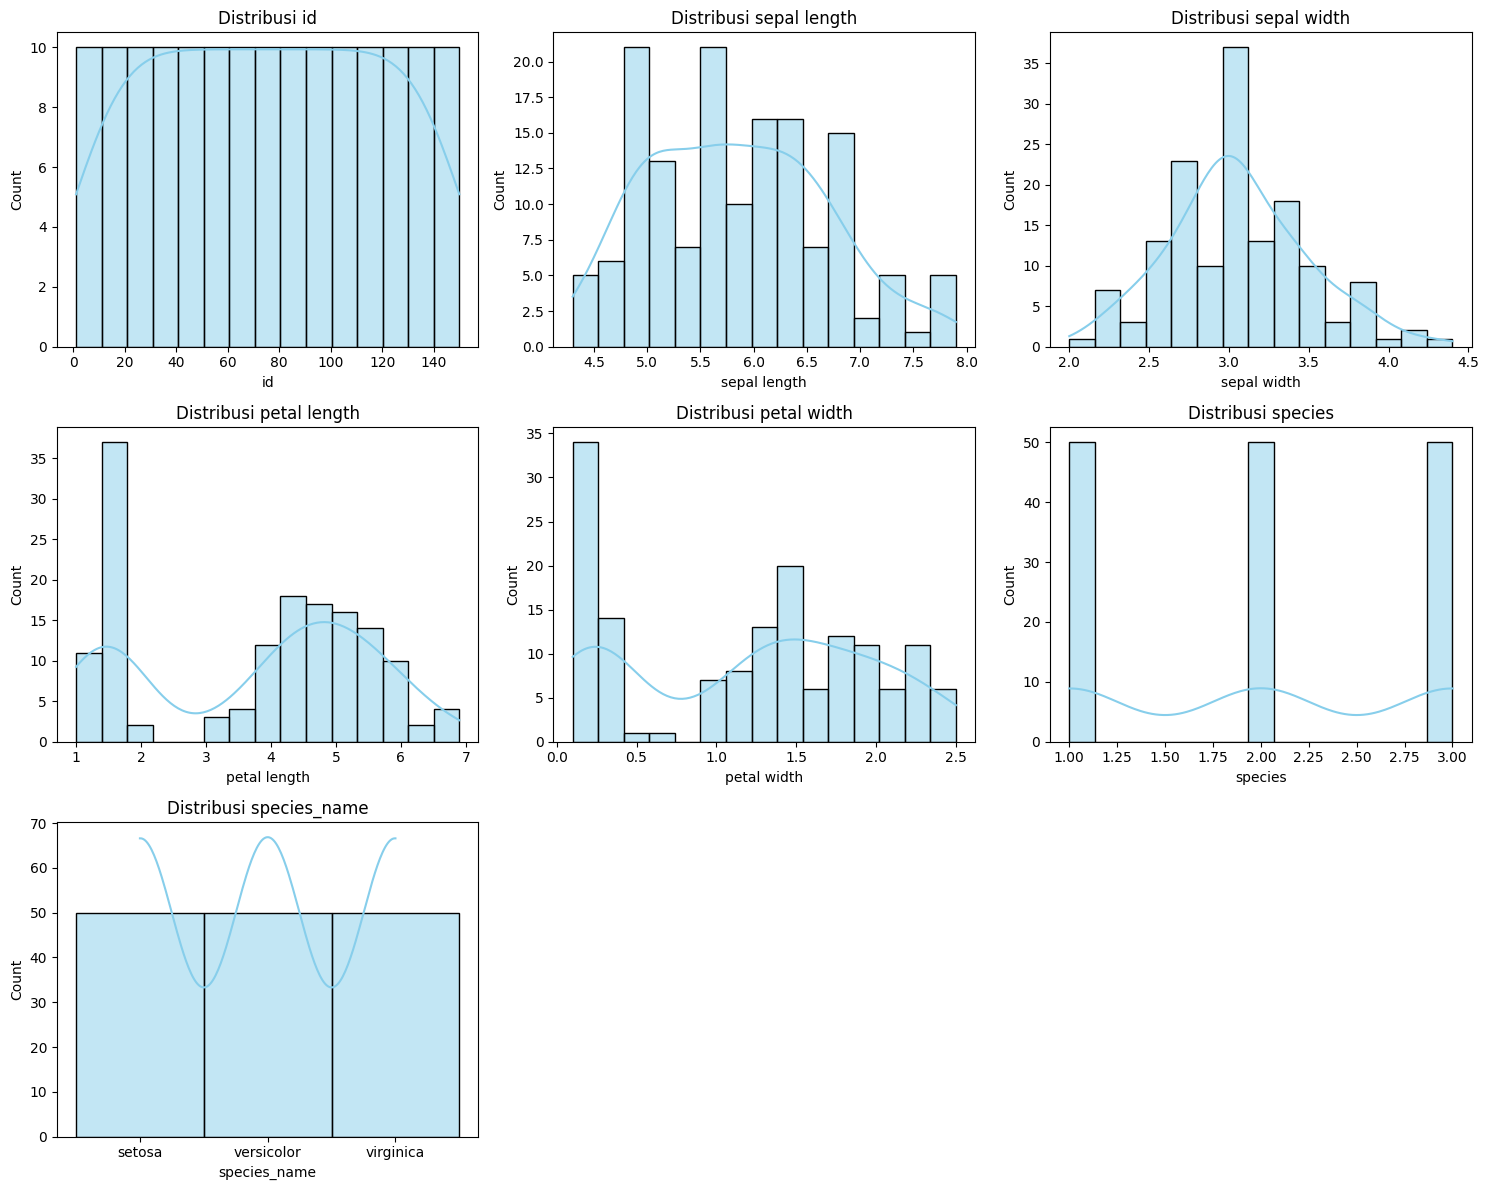

In [7]:
numeric_cols = ['id', 'sepal length', 'sepal width', 'petal length', 'petal width', 'species', 'species_name']

plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)  # grid 3x3
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

### **Keterangan Gambar**

```{note}
Berikut interpretasi distribusi dari masing-masing fitur pada dataset Iris.
```

### **Distribusi id**
- Histogram `id` merata (flat), karena `id` hanya penomoran urut dari 1–150.

### **Distribusi sepal length**
- Bentuk distribusi agak mendekati normal, dengan sebagian besar data berada pada 5–7 cm.  
- Rentang nilai: **4.3 – 7.9**.  
- Mayoritas bunga memiliki sepal panjang sedang, hanya sedikit yang ekstrem (sangat pendek atau sangat panjang).  

### **Distribusi sepal width**
- Distribusi agak simetris, tapi sedikit miring ke kanan (*positively skewed*).  
- Rentang nilai: **2.0 – 4.4**.  
- Ada beberapa outlier (misalnya di atas 4.0), yang perlu diperhatikan saat analisis.  

### **Distribusi petal length**
- Distribusi **bimodal** (ada dua puncak utama): satu di sekitar 1.5 cm (setosa), dan satu lagi sekitar 4–5.5 cm (versicolor & virginica).  
- Ini menandakan **perbedaan spesies** cukup jelas berdasarkan panjang petal.  

### **Distribusi petal width**
- Mirip dengan petal length, juga menunjukkan pola bimodal.  
- Setosa punya petal sangat sempit (≤0.5 cm), sedangkan versicolor dan virginica lebih lebar (1–2.5 cm).  

### **Distribusi species**
- Karena ini numerik hasil encoding (`1=setosa, 2=versicolor, 3=virginica`), maka histogram menunjukkan tiga puncak yang sama tinggi (masing-masing 50 data).  
- Ini menandakan dataset **seimbang (balanced)** antar spesies.  

### **Distribusi species_name**
- Visualisasi kategorikal: jumlah setosa, versicolor, virginica sama (50 masing-masing).  
- Mengonfirmasi bahwa dataset tidak bias ke salah satu kelas.

### **Kesimpulan dari Histogram**

- Fitur petal length dan petal width punya daya pisah yang kuat antar spesies (baik secara range maupun distribusi).
- Sepal length cukup variatif tapi tidak sekuat petal dalam membedakan kelas.
- Sepal width terlihat memiliki outlier, sehingga perlu diperhatikan saat pemodelan.
- Dataset sangat seimbang (50 data per spesies), sehingga cocok untuk klasifikasi.

## **8. Visualisasi Jumlah Setiap Kelas**

Membuat bar plot untuk melihat jumlah data pada setiap kelas (Species).

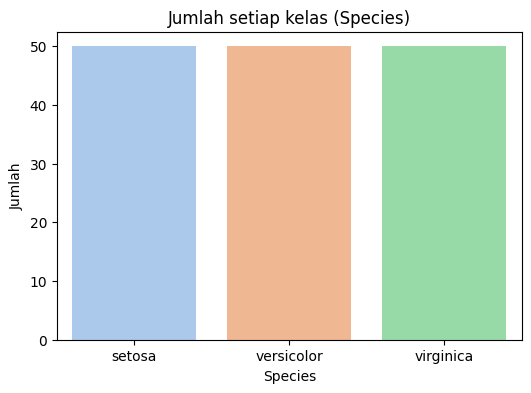

In [8]:
plt.figure(figsize=(6,4))

# Countplot dengan nama species_name, bukan angka
sns.countplot(x='species_name', data=df, palette='pastel')

# Tambahkan judul
plt.title("Jumlah setiap kelas (Species)")

# Label sumbu
plt.xlabel("Species")
plt.ylabel("Jumlah")

plt.show()


## **9. Visualisasi Awal Hubungan Fitur**

Membuat scatter plot Petal Length vs Petal Width untuk melihat apakah kelas mudah dipisahkan.

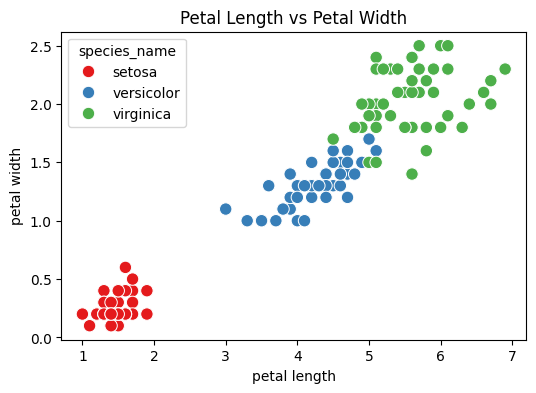

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='petal length',
    y='petal width',
    hue='species_name',  # bisa pakai ID atau nama species
    data=df,
    palette='Set1',
    s=80
)
plt.title("Petal Length vs Petal Width")
plt.show()


### **Penjelasan Gambar**

- **Setosa (merah)** terlihat sangat terpisah dengan nilai petal length dan petal width yang rendah.
- **Versicolor (biru)** dan **Virginica (hijau)** memiliki sebaran yang lebih berdekatan, tetapi masih dapat dipisahkan karena Virginica cenderung memiliki petal lebih panjang dan lebar.
- Variabel **Petal Length** dan **Petal Width** membedakan kelas (species), khususnya dalam membedakan Setosa dari dua spesies lainnya.
- Ini menegaskan bahwa kombinasi fitur petal merupakan predictor yang kuat untuk klasifikasi pada dataset Iris.

## **10. Insight Awal**

Dari histogram, scatter plot, dan bar plot:

- Tidak ada missing values, data bersih.
- Distribusi tiap kelas relatif seimbang.
- Scatter plot menunjukkan bahwa beberapa spesies dapat dipisahkan dengan jelas berdasarkan petal measurements.

```{tableofcontents}
```

```{tableofcontents}
```